### CSP1
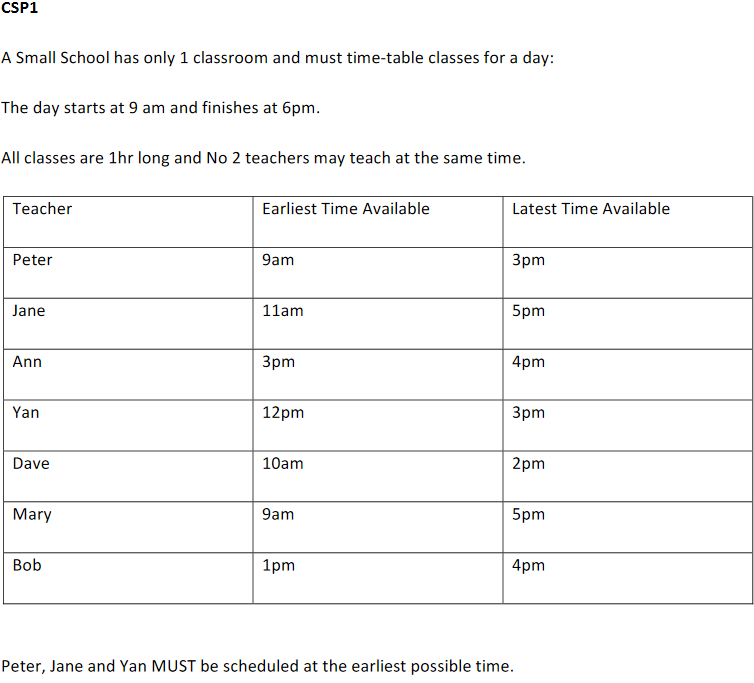

### Discussion
A Constraint Satisfaction Problem will typically contain 3 parts (Tang, n.d.), the first is a set of variables which in this case is both the teachers and the hours that they can work. The second part is the domain which is the classroom and the third and final part is a set of constraints. There are some different constraints which are that firstly there is only a single classroom and there can be no teaching a class while there is already one going on. The second constraint is that certain teachers have to be facilitated with their teaching as early as possible from their availability time.

#### Imports
The first thing that needs to be done in the code is obviously the imports, one of which is the csp.py file that we have used previously as well as importing some needed Python data structures.

In [7]:
import csp
from csp import Constraint, CSP
from typing import Dict, List, Optional

#### Constraint Class
After our imports then we will declare a class which takes Constraint as a parameter, this in turn has a list(Programiz.com, 2015b) passed in which contains both strings and integers. The class then has the init method which
is the Python equivalent of a constructor and is declared at the top of the class. The satisfied method checks for both duplication of variabled as well as to ensure all variables were assigned, if either are not true then false is returned.

In [8]:
class classScheduleConstraint(Constraint[str, int]):
    def __init__(self, teachers: List[str]) -> None:
        super().__init__(teachers)
        self.teachers: List[str] = teachers

    def satisfied(self, assignment: Dict[str, int]) -> bool:
        # Check for duplicates, if so there is not a solution
        if len(set(assignment.values())) < len(assignment):
            return False

        # if all variables have been assigned, check if it adds correctly
        if len(assignment) == len(self.teachers):
            return 
        return True # no conflict

#### Main Method
In the main method we will begin by declaring our variables, firstly we declare a string list that will hold a list of all the teachers names. Then we will create a dictionary (Programiz.com, 2015a) which will hold both the teachers names as well as a list of the hours that they are available in integer form. 

Once this has been completed then we will assign a number for each potential hour value, 9.00 to 17.00 has 9 values, or if we wish to start from 0 then it will be 0 - 8. 

We then need to eliminate the hours that we would not like to be assigned because they must be reserved for the teachers with schedule constraints. We do this by passing the list of teachers that have no schedule constraints to the hours which would not be affected by the schedule constraints and could be taught freely.

Then we pass the list of teachers and their possible hours to the constraint which will then run through each combination of teacher and hour to see if there is a solution available. 

In [88]:
if __name__ == "__main__":
    teachers: List[str] = ["Peter", "Jane", "Ann", "Yan", "Dave", "Mary", "Bob"]
    possible_hours: Dict[str, List[int]] = {"Peter" : [9, 10, 11, 12, 13, 14, 15],
                                           "Jane": [11, 12, 13, 14, 15, 16, 17],
                                           "Ann": [15, 16],
                                           "Yan": [12, 13, 14, 15],
                                           "Dave": [10, 11, 12, 13, 14],
                                           "Mary": [9, 10, 11, 12, 13, 14, 15, 16, 17],
                                           "Bob": [13, 14, 15, 16]}
    
    # Digits in this case match the number of hours of school time
    for teacher in teachers:
        possible_hours[teacher] = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
        
    # Peter, Jane, Yan must start at the earliest time possible so we do not
    # Want to allow the other teachers to teach at this time if possible
    possible_hours["Ann", "Dave", "Mary", "Bob"] = [10, 13, 14, 15, 16, 17]
    csp: CSP[str, int] = CSP(teachers, possible_hours)
    csp.add_constraint(classScheduleConstraint(teachers))
    solution: Optional[Dict[str, int]] = csp.backtracking_search()

#### Check solution
The final action that needs to be taken is to run the check solution method which will check to see if there is a solution available and if so display, otherwise it will display the no solution message.

In [89]:
def check_solution():
    if solution is None:
        print("No solution found!")
    else:
        print(solution)

In [90]:
check_solution()

No solution found!


#### Result
As can be seen from above there is no solution found as has been the case for multiple attempts at running the code with slight changes, however this is likely due to the constraints in the main method not being correctly defined and implemented rather than a solution not being available.

### CSP2
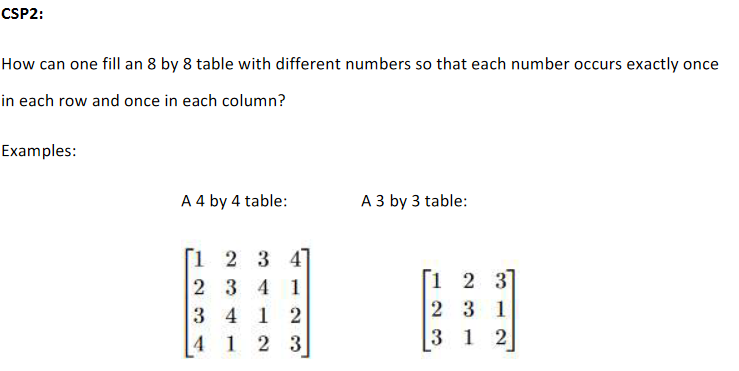

### Discussion
This problem appears at first glance to be similar in nature to several examples that we used or discussed in class, however there is something which is pretty much identical and can be fine-tuned to help us reach a solution and is well known as an application of Constraint Satisfaction and this is Sudoku.(AskPython, 2021)

Sudoku is a popular number placement puzzle game(Wikipedia Contributors, 2021) and is based on a 9 * 9 grid which is then broken up into 3 * 3 grids. The constraining factors differ slightly but they are similar in that a number can only be once in a column or row which makes it similar to this problem, the difference is that Sudoku also has an additional constraining fact which is that each number can also only appear once in the 3 * 3 sub-grid.

In our case however we will use a single grid which can be constructed using a multidimensional list which is a list which contains other lists (GeeksforGeeks, 2018), this is created to match the necessary dimensions (8 height and width) of the number grid that we need to use to solve our problem.  


#### Variables
The first step is to declare variables to match our number grid dimensions so that a grid can be created which is then followed by initialising it to be filled with 0's. We will also need to set a number range which matches the grid dimensions to avoid any list index errors which will occur if dimensions are breached.

In [91]:
# Code samples and ideas from
# https://www.geeksforgeeks.org/multi-dimensional-lists-in-python/
# https://www.askpython.com/python/examples/sudoku-solver-in-python

# Variables
# Create a grid of 64 (8 * 8)
grid_height = 8
grid_width = 8

# The range being used will also need to be set to 8
# to avoid out of bounds issues
num_range = 8

# Populate the grid with 0's to initialise (Similar to when we initialise a variable)
grid = [[0 for x in range(grid_height)] for x in range(grid_width)]

# Print the initialised grid to ensure that it is working
print('Initialised Grid \n', grid)

Initialised Grid 
 [[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]


#### Solver
Once our grid has been passed from the number grid method into the solving method, we can then perform any backtracking checks that need to be done. This is performed by using the number range as a guide and going back along the present row and column to check that the number that is not already present. If the number is found then a false value is sent back and the number will not be added however if the backtracking does not find the number present, then it will be added to the grid and then the process can be repeated. 

In [3]:
def solver(grid, row, col, num):
    # Checking if the number at present is equal to row value
    # If so then false is returned and the number is not added to the grid
    for x in range(num_range):
        if grid[row][x] == num:
            return False
    
    # Checking if the number at present is equal to column value
    # If so then false is returned and the number is not added to the grid
    for x in range(num_range):
        if grid[x][col] == num:
            return False
 
    # Once the 8th column and 8th row has been reached then the need for backtracking
    # has reached an end and can be stopped so the value can be set to true and added to
    # the grid
    startRow = row % 2
    startCol = col % 2
    for i in range(1):
        for j in range(1):
            if grid[i + startRow][j + startCol] == num:
                return False
    return True
    


#### Create number grid
Once we run the code the grid that we have created will be passed into a number grid method in order for numbers to be assigned to the individual cells in the grid. This grid will then be iterated over and the function will place the numbers that are available once the solver method has returned a true or false value. Our number grid method will go to the edge of the grid in steps of 1 and will populate the grid each time that a number has comeback from the solver with a true value until the cells and rows available are exhausted.

In [47]:
def number_grid(grid, row, col):
    if (row == num_range - 1 and col == num_range):
        return True
    
    if col == num_range:
        row += 1
        col = 0
        
    if grid[row][col] > 0:
        return number_grid(grid, row, col + 1)
    
    # Goes to edge of the grid in steps of 1
    for num in range(1, num_range - 1, 1):
        # If the solving function returns a number then the cell is given the number
        # After which then the next cell is looked at (if there are any left)
        if solver(grid, row, col, num):
            grid[row][col] = num
            if number_grid(grid, row, col + 1):
                return True
        grid[row][col] = 0
    return False

#### Check Solution
The final couple of steps in this are to pass the grid which by now has been populated with numbers that are correct into a print grid method which will prepare the grid so that it can be printed to screen. This is then passed into the check solution method which actually prints the grid for the user.

In [61]:
# This function prints the grid and assigns the numbers to the rows and columns
def print_grid(a):
    for i in range(num_range):
        for j in range(num_range):
            # Prints columns of numbers
            print(a[i][j], end = " ")
        print()

# Pass in the the number_grid to the grid
# If there is a populated number grid present it will be printed
def check_solution():
    if(number_grid(grid, 0, 0)):
        print_grid(grid)
    else:
        print("No solution found!")

In [63]:
check_solution()

1 2 3 4 5 6 7 8 
2 1 4 3 6 5 8 7 
3 4 2 1 7 8 5 6 
4 3 1 2 8 7 6 5 
5 6 7 8 2 1 3 4 
6 5 8 7 1 2 4 3 
7 8 5 6 3 4 2 1 
8 7 6 5 4 3 1 2 


### Reference List

AskPython. (2021). Sudoku Solver in Python - AskPython. [online] Available at: https://www.askpython.com/python/examples/sudoku-solver-in-python [Accessed 5 Jun. 2021].

GeeksforGeeks. (2018). Multi-dimensional lists in Python - GeeksforGeeks. [online] Available at: https://www.geeksforgeeks.org/multi-dimensional-lists-in-python/ [Accessed 5 Jun. 2021].

Programiz.com. (2015a). Python Dictionary (With Examples). [online] Available at: https://www.programiz.com/python-programming/dictionary [Accessed 6 Jun. 2021].

Programiz.com. (2015b). Python List (With Examples). [online] Available at: https://www.programiz.com/python-programming/list [Accessed 6 Jun. 2021].

Tang, D. (n.d.). Constraint Satisfaction Problems. [online] . Available at: https://www.cpp.edu/~ftang/courses/CS420/notes/CSP.pdf [Accessed 5 Jun. 2021].

Wikipedia Contributors (2021). Sudoku. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Sudoku [Accessed 5 Jun. 2021].

### Additional Notes
There seems to be an issue at times with Jupyter where the solution for CSP 2 is coming up as no solution, this seems to
then disappear when restarting the application after a full Windows reboot.